In [1]:
import numpy as np
import pandas as pd
import yfinance
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

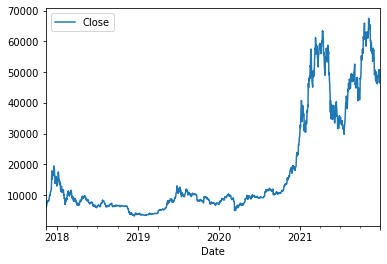

In [2]:
btc = yfinance.download(tickers= "BTC-USD", period= "max")
btc = pd.DataFrame(btc["Close"])
btc.plot()

In [3]:
def AssetReturn(Asset):
    return Asset.diff()/Asset[1:len(Asset)]

AssetReturn(btc)

,Close
Date,
2017-11-09,NaN
2017-11-10,-0.079394
2017-11-11,-0.040981
2017-11-12,-0.068492
2017-11-13,0.092907
...,...
2021-12-27,-0.003339
2021-12-28,-0.064123
2021-12-29,-0.024635


In [17]:
def logAssetReturn(Asset):
    return np.log(Asset).diff()

logAssetReturn(btc)

,Close
Date,
2017-11-09,NaN
2017-11-10,-0.076400
2017-11-11,-0.040163
2017-11-12,-0.066248
2017-11-13,0.097510
...,...
2021-12-27,-0.003334
2021-12-28,-0.062151
2021-12-29,-0.024336


array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

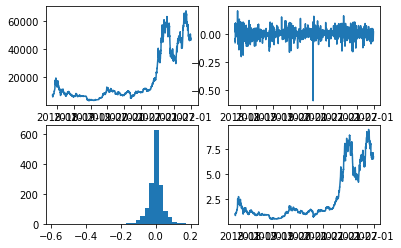

In [5]:
def plotAssets(Asset):
    fig, axs = plt.subplots(2, 2)
    axs[0,0].plot(Asset)
    axs[0,1].plot(AssetReturn(Asset))
    axs[1,0].hist(AssetReturn(Asset), bins= round(len(Asset)/50))
    axs[1,1].plot(Asset/Asset["Close"][0])

    return axs

plotAssets(btc)


In [13]:
def Assimetry(Asset):
    return np.mean(((Asset - np.mean(Asset))/np.std(Asset))**3)

def Kurtosis(Asset):
    return np.mean(((Asset - np.mean(Asset))/np.std(Asset))**4)


def descibeAsset(Asset):
    print("Mean: {} / Std: {} / Assimetry: {} / Kurtosis: {}".format(np.mean(Asset), np.std(Asset), Assimetry(Asset), Kurtosis(Asset)))

descibeAsset(AssetReturn(btc["Close"]))

Mean: 0.0003759058822834633 / Std: 0.042766531062931136 / Assimetry: -1.941510125297247 / Kurtosis: 28.898466374968745


In [19]:
def JarqueBera(Asset):
    return (len(Asset)/6) * Assimetry(Asset)**2 + (len(Asset)/24) * (Kurtosis(Asset) - 3)**2

print(JarqueBera(AssetReturn(btc["Close"])), JarqueBera(logAssetReturn(btc["Close"])))


43263.08033161072 9926.192497496562
